# Business problem

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

 

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

# 1) Data Understanding

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries 
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lets Import the data & understand
Retail = pd.read_csv('Global+Superstore+Data.csv')
Retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
Retail.shape

(51290, 5)

In [5]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
Retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [7]:
Retail.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

As we can see there is No Null Value are there in the Dataset.
Now we can move to next Step that is Data Preparation for Model Building.

### Lets Visualise first about the Data to understand more

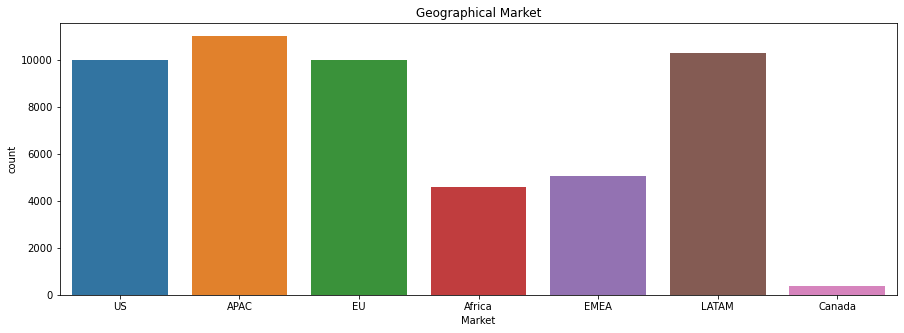

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Market', data = Retail)
plt.title('Geographical Market');

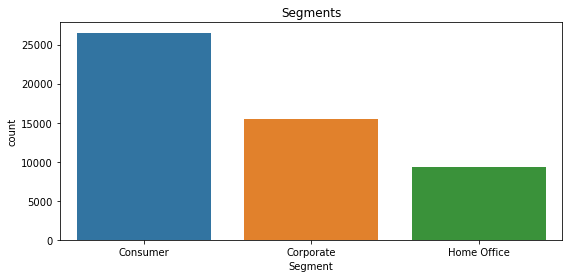

In [9]:
plt.figure(figsize=(9,4))
sns.countplot(x= 'Segment', data = Retail)
plt.title('Segments');

# 2) Data Preparation

## 2.1) Market Segments

In [10]:
Retail['Market_Segment']= Retail['Market'] +'_' + Retail['Segment']
Retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [11]:
Retail.nunique().sort_values()

Segment               3
Market                7
Market_Segment       21
Order Date         1430
Sales             22995
Profit            24575
dtype: int64

######  As we can see there are 21 Maket Segments we have combined through 7 geographical markets & 3 sengments.

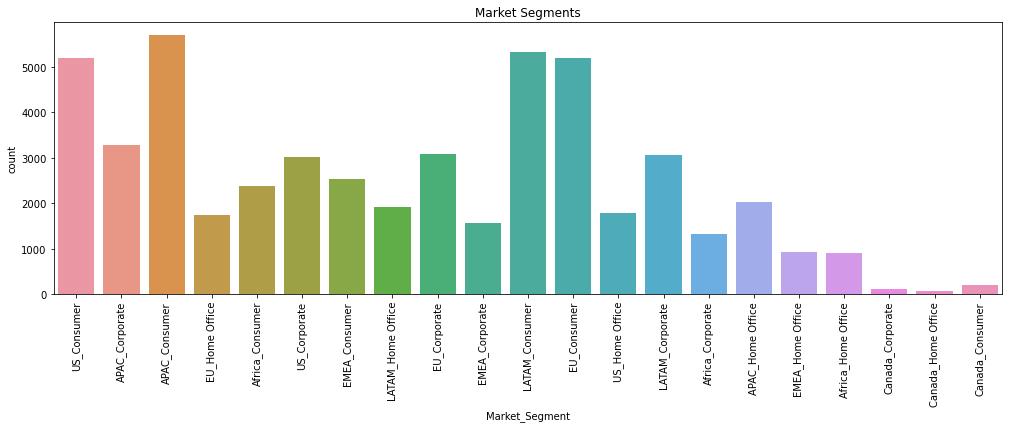

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(x= 'Market_Segment', data = Retail)
plt.title('Market Segments')
plt.xticks(rotation = 90);

### Lets Compare Market segment with Profit

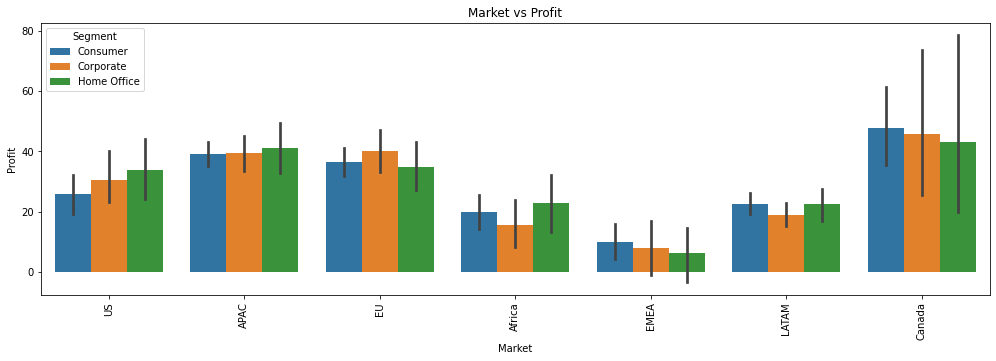

In [13]:
plt.figure(figsize=(17,5))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=Retail)
plt.title('Market vs Profit')
plt.xticks(rotation = 90);

### Inferences 
1) APAC & Canada Market segments have comparatively more profit.

2) EMEA market is least profit making Market segment.

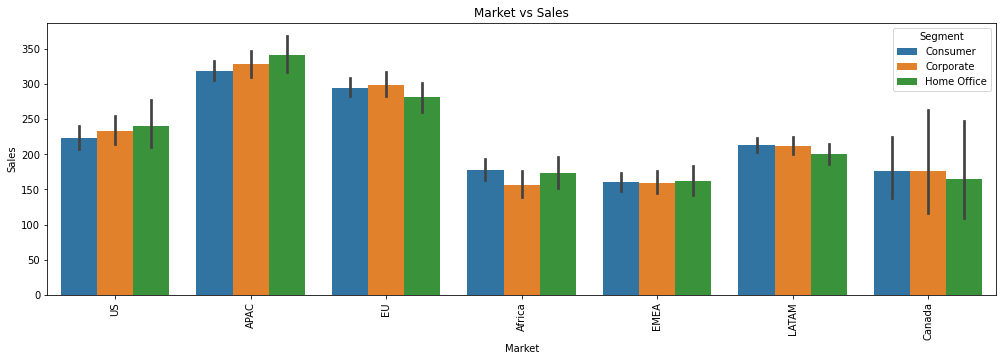

In [14]:
plt.figure(figsize=(17,5))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=Retail)
plt.title('Market vs Sales')
plt.xticks(rotation = 90);

### Inferences
1) APAC is Highest selling Market

2) EMEA & Africa have less sales

## 2.2) Keeping Necessary Columns

Your dataset after the above step should have Order-Date, Sales, Profit against each market segment such as APAC-Consumer, APAC-Home Office and so on.

In [15]:
# Now we already have Market_Segment Lets Drop Market & Sengment Columns.
Retail = Retail.drop(['Market','Segment'],axis=1)
Retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


## 2.3) Date-time format

Once you have understood the dataset of the global data store, you need to get the order date in the required month-year format to make it a monthly aggregated transaction data. For this, convert the order-date into a date-time format for getting it into the Month-year format; you will get the data for 48 months now.

In [16]:
Retail['Order Date'] = pd.to_datetime(Retail['Order Date']).dt.to_period('m')
Retail = Retail.sort_values(by=['Order Date'])
Retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [17]:
Retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [18]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


## 2.4) Monthly Aggregated transaction data

In [19]:
Retail_profit= Retail.pivot_table( index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
Retail_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [20]:
Retail_profit.shape

(48, 21)

## 2.5) Train-test Split

After the above step, perform the train-test split such that you take the 42 months as the train data and the 6 months as the test data.

In [21]:
train_len = 42
train = Retail_profit[0:train_len] 
test = Retail_profit[train_len:] 

In [22]:
train.shape

(42, 21)

In [23]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


## 2.6) coefficient of variation

#### Calculate the CoV on the profit for each of the 21 market segments on the train data.

In [24]:
Mean =np.mean(train)
Std= np.std(train)

CoV_df= pd.DataFrame(Mean)
CoV_df['std']= Std
CoV_df['CoV'] = Std/Mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


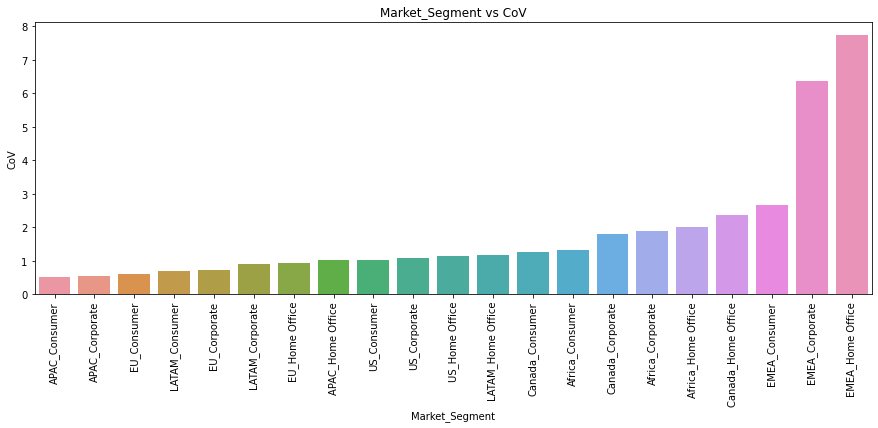

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df)
plt.title('Market_Segment vs CoV')
plt.xticks(rotation = 90);

In [26]:
Most_Profitable_Market_Segment =min(CoV_df["CoV"])
Most_Profitable_Market_Segment

0.5227250555218101

### Inferences 
1) As we can see from Graph & calculations APAC_Consumer Seems Most Profitable Market Segment.

### Most Profitable Market Segment = APAC_Consumer

## 2.7) Convert the Order-Date column to month-year format

In [27]:
Retail['Order Date'] = Retail['Order Date'].astype(str)
Retail['Order Date'] = pd.to_datetime(Retail['Order Date'])

In [28]:
Retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01-01,139.65,15.30,EU_Corporate
26744,2011-01-01,88.44,15.84,EU_Consumer
48614,2011-01-01,11.43,4.11,EU_Corporate
9417,2011-01-01,491.00,122.70,LATAM_Consumer
48590,2011-01-01,4.71,0.00,US_Home Office


# 3) Model Building and Evaluation

In [29]:
Retail_MPMS= Retail[(Retail.Market_Segment=='APAC_Consumer')]
Retail_MPMS.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [30]:
Retail_MPMS.shape

(5699, 4)

### Now we will see the aggregate Sales by Order Date

In [31]:
Agg_Sales = pd.DataFrame(Retail_MPMS.groupby("Order Date")['Sales'].sum())
Agg_Sales.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [32]:
Agg_Sales.shape

(48, 1)

# 3.2) Time series analysis

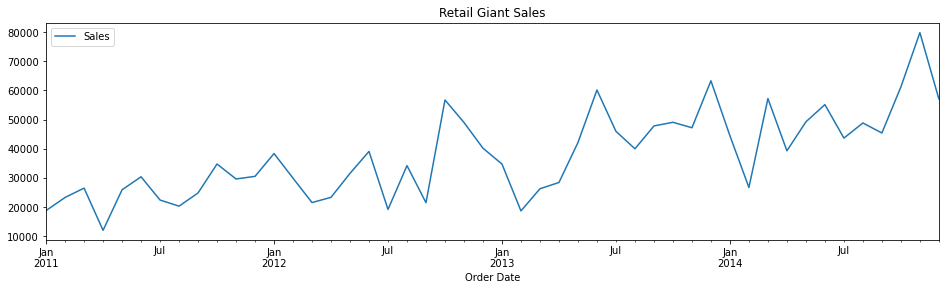

In [33]:
Agg_Sales.plot(figsize=(16, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False);

### Plot the sales for the concerned market segment

###### Decompose the data into the trend, seasonal and residual components

## 3.3) Test Train Split

In [34]:
train_len = 42
train = Agg_Sales[0:train_len]
test = Agg_Sales[train_len:]

In [35]:
train.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [36]:
train.shape

(42, 1)

In [37]:
from pylab import rcParams
import statsmodels.api as sm

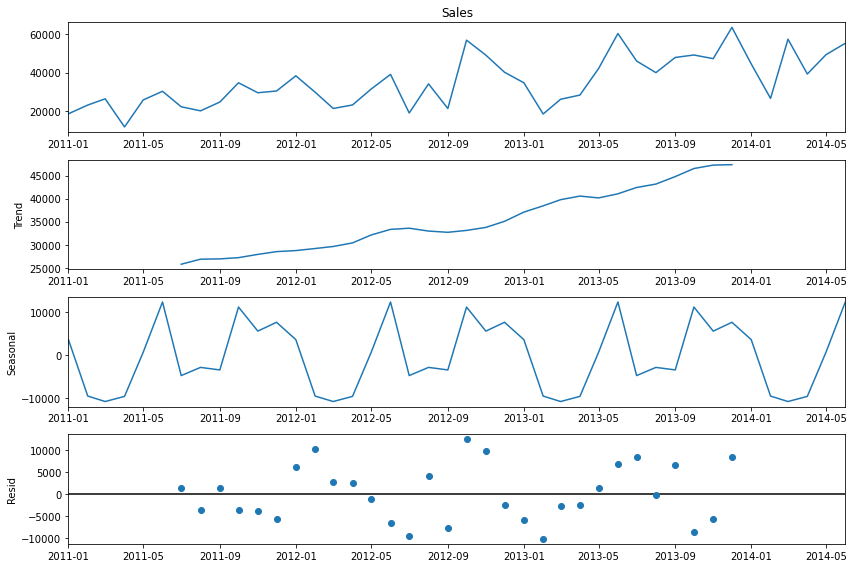

In [38]:
# additive seasonal index
rcParams['figure.figsize'] = 12, 8
Decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive')
fig = Decomposition.plot();

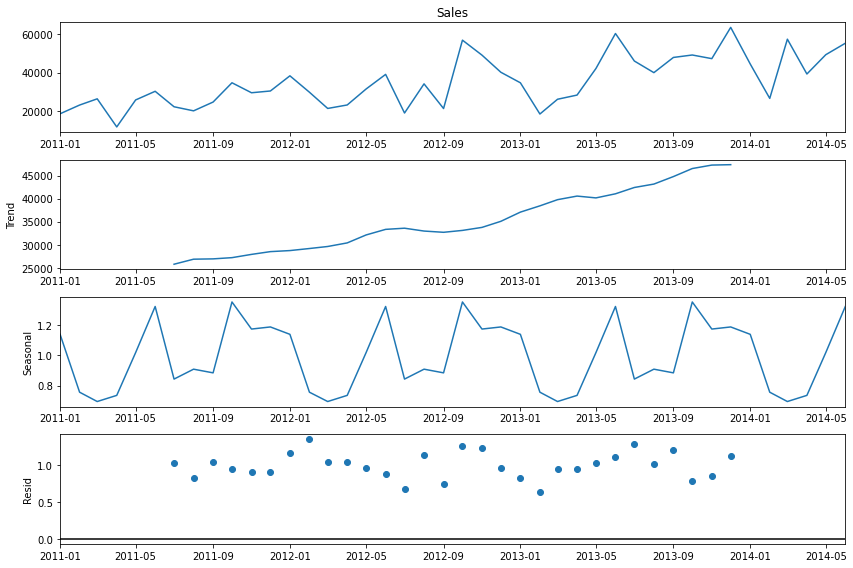

In [39]:
# multiplicative seasonal index
Decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') 
fig = Decomposition.plot();

# 4) Build and evaluate time series forecast

## Simple time series methods
## 4.1)  Naive Method

In [40]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

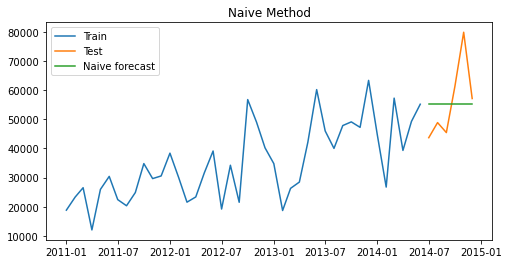

In [41]:
plt.figure(figsize=(8,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method');

### Inferences
1) As we can see in the plot,in order to forecast the sales from month 2014-07 to 2015-01 we we the last or previous month data which is 2014-06

2) We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line

### Calculate RMSE and MAPE

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


## 4.2) Simple average method

In [44]:
# Average of past months sales
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

### Plot train, test and forecast

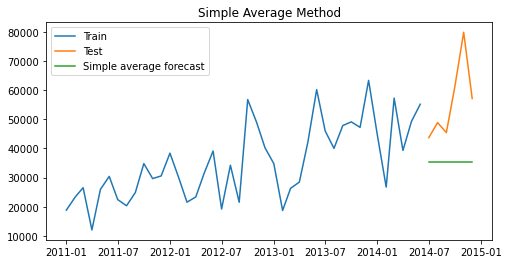

In [45]:
plt.figure(figsize=(8,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method');

### Inferences
1) Forecast of months from 2014-07 to 2015-01 = Average of all past months sales

2) The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality

### Calculate RMSE and MAPE

In [46]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


## 4.3) Simple Moving Average Method

In [47]:
y_hat_sma = Agg_Sales.copy()
ma_window = 3 
y_hat_sma['sma_forecast'] = Agg_Sales['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot Train-Test & Forcast

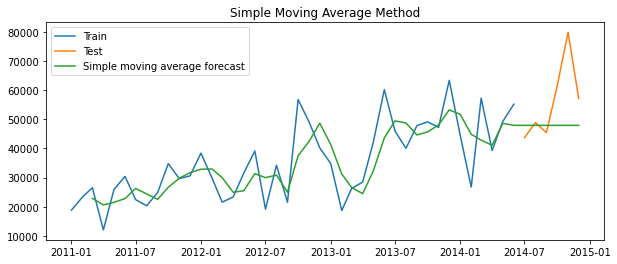

In [48]:
plt.figure(figsize=(10,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method');

### Calculate RMSE and MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


# Exponential smoothing methods

## 4.4) Simple exponential smoothing

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [51]:
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Plot train, test and forecast

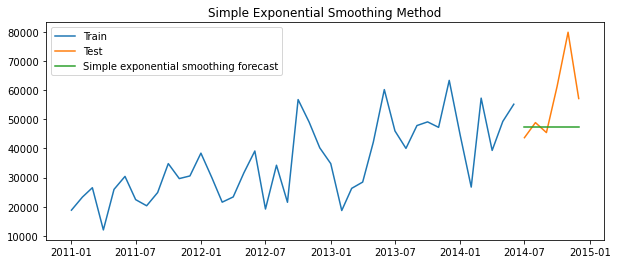

In [52]:
plt.figure(figsize=(10,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method');

### Calculate RMSE and MAPE

In [53]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99


## 4.5) Holt's method with trend

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [55]:
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

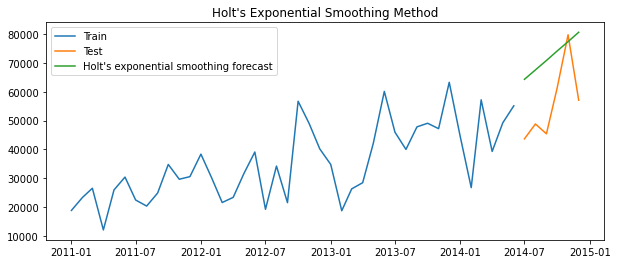

In [56]:
plt.figure(figsize=(10,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method');

### Calculate RMSE and MAPE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


## 4.6) Holt Winters' additive method with trend and seasonality

In [58]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

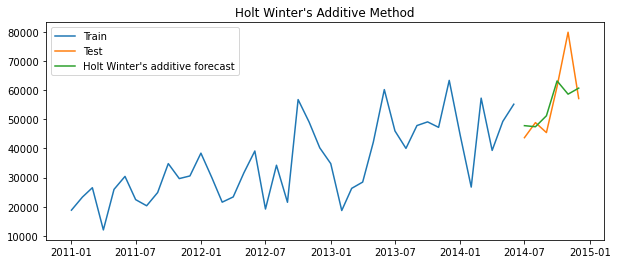

In [59]:
plt.figure(figsize=(10,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winter\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winter\'s Additive Method');

### Plot train, test and forecast

In [60]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


## 4.7) Holt Winter's multiplicative method with trend and seasonality

In [61]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

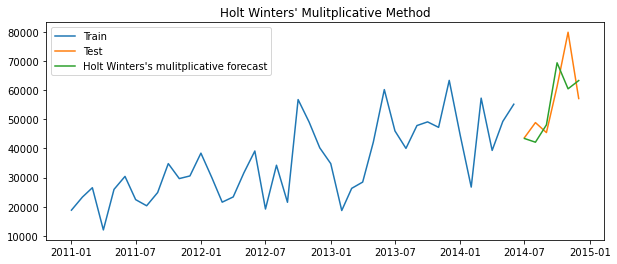

In [62]:
plt.figure(figsize=(10,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method');

### Calculate RMSE and MAPE

In [63]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


### Inferences
1) As we can see Holt Winter's Additive method has the lowest RMSE and MAPE values. Which means error measures are very less in this model

2) Forcasting is also very much closer in Holt Winter's Additive method.

# 5) Auto Regressive methods

### Stationarity vs non-stationary time series

### Plot train, test and forecast

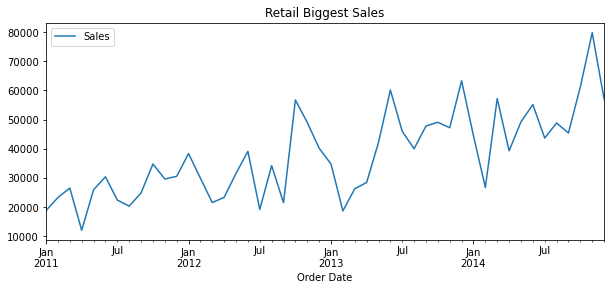

In [64]:
Agg_Sales['Sales'].plot(figsize=(10, 4))
plt.legend(loc='best')
plt.title('Retail Biggest Sales')
plt.show(block=False)

## 5.1) Augmented Dickey-Fuller (ADF) test

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
adf_test = adfuller(Agg_Sales['Sales'])
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### Inferences
1) As we can see that p-value is 0.011, which is less than 0.05. So, we can conclude this Series is Stationary.

## 5.2) KPSS test

In [67]:
from statsmodels.tsa.stattools import kpss

In [68]:
kpss_test = kpss(Agg_Sales['Sales'])
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


### Inferences
1) As we can see that p-value is 0.024, which is less than 0.05. So, we can conclude this Series is Non-Stationary.

## 5.3) Box Cox transformation to make variance constant

#### First we need to convert Non-Stationary into Stationary

In [69]:
from scipy.stats import boxcox

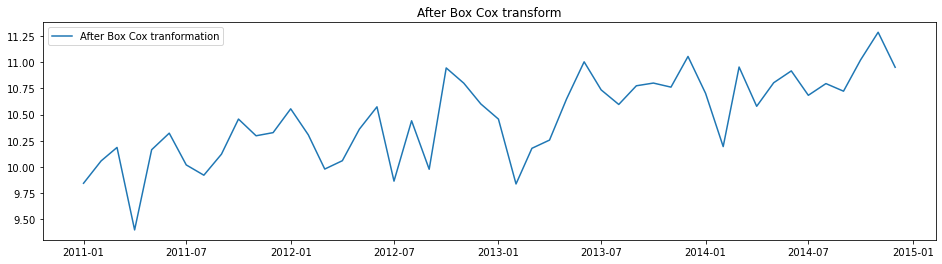

In [70]:
data_boxcox = pd.Series(boxcox(Agg_Sales['Sales'], lmbda=0), index = Agg_Sales.index)
plt.figure(figsize=(16,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform');

## 5.4) Differencing

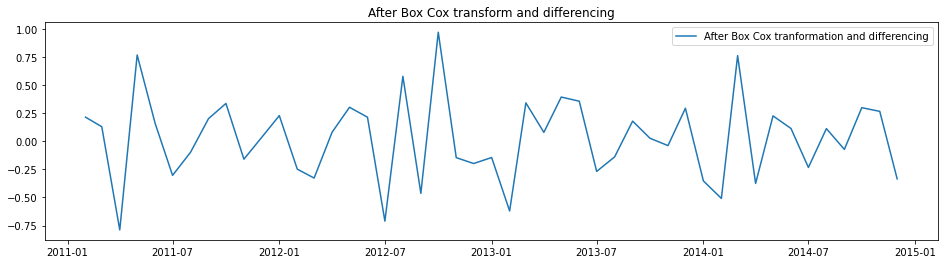

In [71]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), Agg_Sales.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(16,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing');

### Inferences
1) Now series looks like Stationary.

2) Mean is Centered around Zero. 


## 5.5) ADF test

In [72]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Inferences 
1) As we can see that p-value is 0.0001, which is less than 0.05. So, we can conclude this Series is Stationary.

## 5.6) KPSS Test

In [73]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Inferences
1) As we can see that p-value is 0.10, which is More than 0.05. So, we can conclude this Series is Stationary.

2) As we have done differencing we have expected this to happen. Now everything is good to go ahead.

3) Now Series is staionary We can build Auto Regressive Model.

## 5.7) Autocorrelation function (ACF) Plot

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

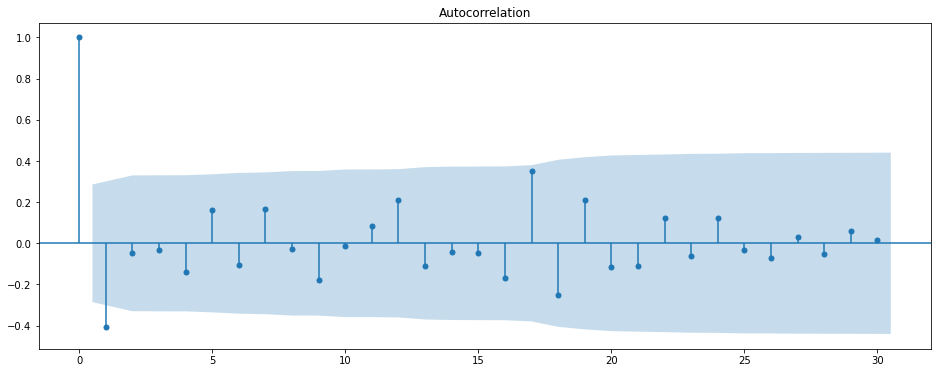

In [75]:
plt.figure(figsize=(16,6))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30);

## 5.8) Partial autocorrelation function (PACF)

In [76]:
from statsmodels.graphics.tsaplots import plot_pacf

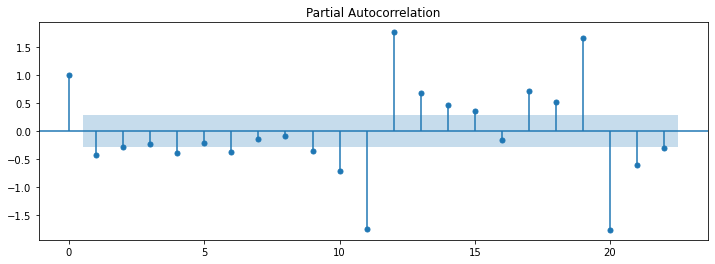

In [77]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22);

### Split into Training & test data Sets

In [78]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# 6) Auto regression method (AR)

In [79]:
from statsmodels.tsa.arima_model import ARIMA

In [80]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [81]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

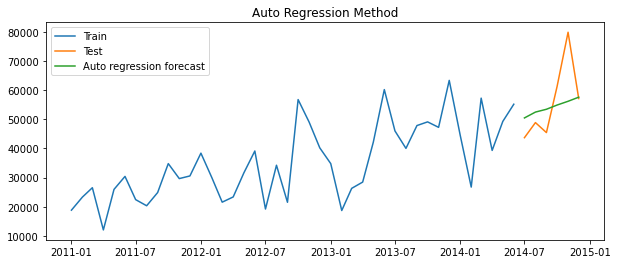

In [82]:
plt.figure(figsize=(10,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method');

### Inferences
1) As we can see we can capture the trend in the forcast but not able to capture Seasonality

### Calculate RMSE and MAPE

In [83]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


## 6.2) Moving average method (MA)

In [84]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [85]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

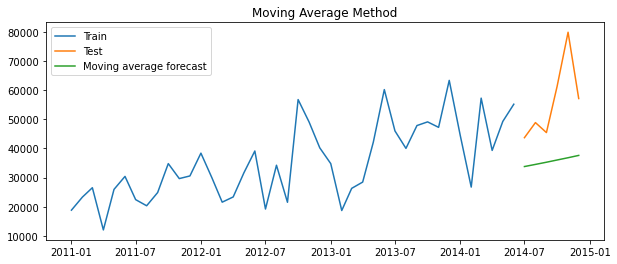

In [86]:
plt.figure(figsize=(10,4))
plt.plot(Agg_Sales['Sales'][:train_len], label='Train')
plt.plot(Agg_Sales['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method');

### Inferences
1) As we can see again we can capture the trend in the forcast but not able to capture Seasonality

### Calculate RMSE and MAPE

In [87]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


## 6.3) Auto regression moving average method (ARMA)

In [88]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series forecast

In [89]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

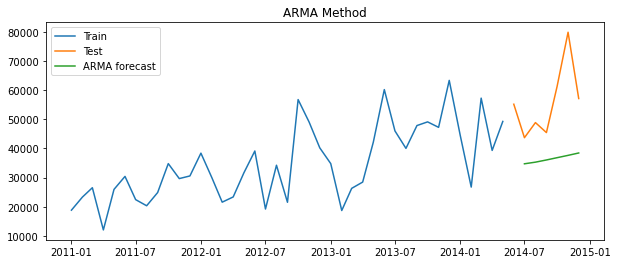

In [90]:
plt.figure(figsize=(10,4))
plt.plot(Agg_Sales['Sales'][:train_len-1], label='Train')
plt.plot(Agg_Sales['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method');

### Calculate RMSE and MAPE

In [91]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## 6.4) Auto regressive integrated moving average (ARIMA)

In [92]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series forecast

In [93]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

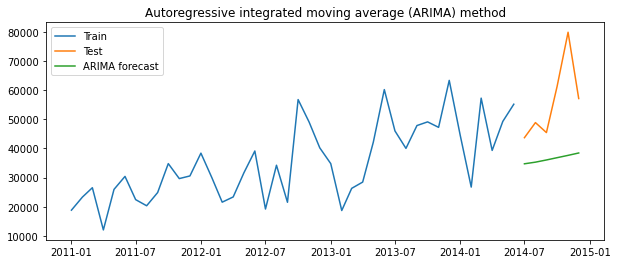

In [94]:
plt.figure(figsize=(10,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method');

### Calculate RMSE and MAPE

In [95]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Inferences 
1)  RMSE and MAPE is very High

## 6.5) Seasonal auto regressive integrated moving average (SARIMA)

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [97]:
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041622
ma.L1      -0.996737
ar.S.L12    0.099996
ma.S.L12   -0.968194
sigma2      0.058472
dtype: float64


### Recover original time series forecast

In [98]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

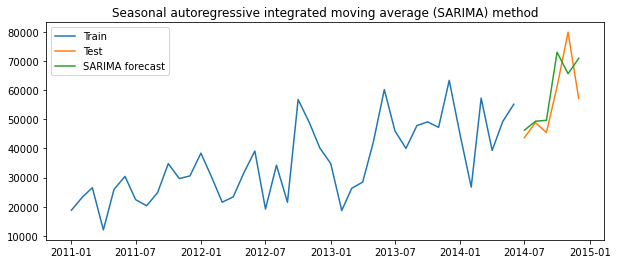

In [99]:
plt.figure(figsize=(10,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [100]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Inferences
1) As we can see In all the methods done in the ARIMA, we can say Forcasting Using SARIMA Method predicting sales better than other methods.

2) RMSE and MAPE values for this method is the least in all the methods done

# Conclusion

### 1) Holt Winters additive method is the best forecasting method in the smoothing technique.

### 2) SARIMA - Seasonal Autoregressive Integrated moving average is the best method in ARIMA Techniques.